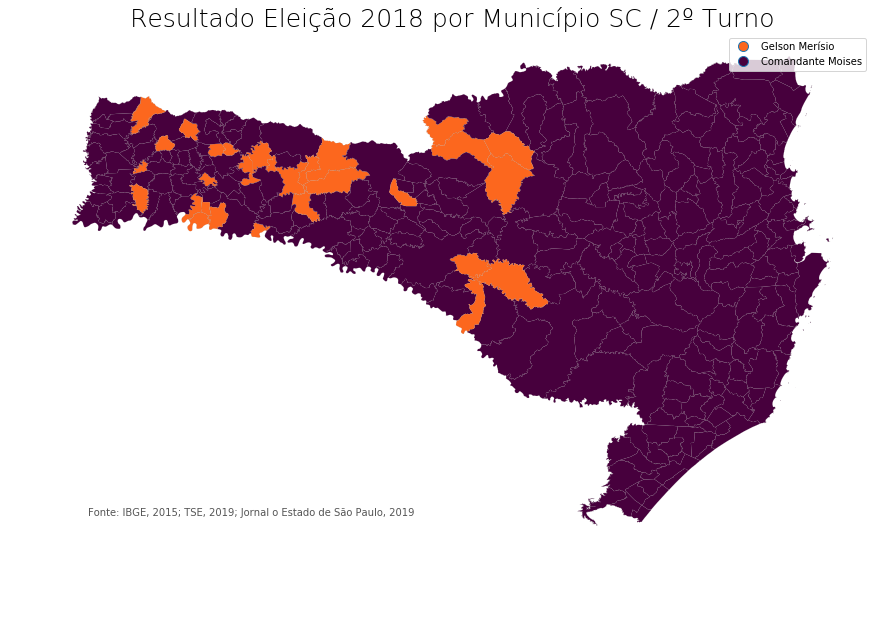

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
df_mapsc = gpd.read_file(r'C:\Users\Marcio\Desktop\Data Science\Mapas IBGE\BRMUE250GC_SIR.shp')
df_votosc = pd.read_csv('votacao_candidato_munzona_2018_SC.csv', sep=';', encoding='latin1')
df_votosc = df_votosc[df_votosc['NR_TURNO']==2]
df_votosc = df_votosc[['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO','NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS']]
df_votosc = df_votosc.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO','NR_CANDIDATO', 'NM_URNA_CANDIDATO',]).sum().reset_index()
df_votosc.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False, inplace=True)
df_votosc.drop_duplicates(subset='CD_MUNICIPIO', keep='first', inplace=True)
df_votosc['RESULTADO']= df_votosc['NR_CANDIDATO'].apply(lambda x: x == 17 )
link = 'https://raw.githubusercontent.com/estadao/como-votou-sua-vizinhanca/master/data/votos/correspondencia-tse-ibge.csv'
df_link = pd.read_csv(link)
df_votosc1 = df_votosc.copy()
df_votosc1.set_index('CD_MUNICIPIO', drop=False, inplace=True)
df_link1 = df_link.copy()
df_link1.set_index('COD_TSE', drop=False, inplace=True)
df_votosc2 = df_votosc1.join(df_link1)
df_votosc2['GEOCOD_IBGE'] = df_votosc2['GEOCOD_IBGE'].astype(str)
df_mapsc.set_index('CD_GEOCMU', drop=False, inplace=True)
df_votosc2.set_index('GEOCOD_IBGE', drop=False, inplace=True)
df_mapsc1 = df_mapsc.join(df_votosc2)
df_mapsc1.drop(columns=['AJUSTE'], inplace=True)
df_mapsc1.dropna(inplace=True)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#fc671e', '#47003d'])
fig, ax = plt.subplots(1, figsize=(15, 15))
ax = df_mapsc1.plot(column='RESULTADO', cmap=cmap, legend=True, linewidth=0.1, ax=ax,edgecolor='grey')
ax.set_axis_off()
ax.set_title('Resultado Eleição 2018 por Município SC / 2º Turno', fontdict={'fontsize': '25', 'fontweight': '5'})
ax.annotate('Fonte: IBGE, 2015; TSE, 2019; Jornal o Estado de São Paulo, 2019',xy=(0.1, 0.2),xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')
leg = ax.get_legend()
leg.get_texts()[0].set_text('Gelson Merísio')
leg.get_texts()[1].set_text('Comandante Moises')

plt.show()
